In [8]:
df=pd.read_csv("Downloads\\heights.csv.txt")

<IPython.core.display.Javascript object>

In [14]:
df.head(2)

,Gender,Height
0,Male,73.847017
1,Male,68.781904


In [16]:
df.sample(4)

,Gender,Height
5788,Female,64.328923
700,Male,69.760095
2720,Male,65.823951
1257,Male,66.901212


In [18]:
df.shape

(10000, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

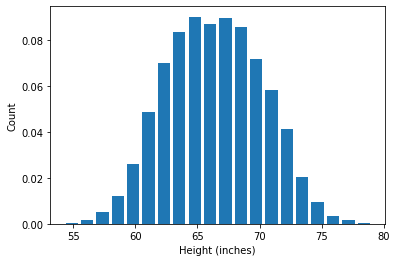

In [26]:
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')


## PLOTTING BELL CURVE

In [24]:
from scipy.stats import norm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

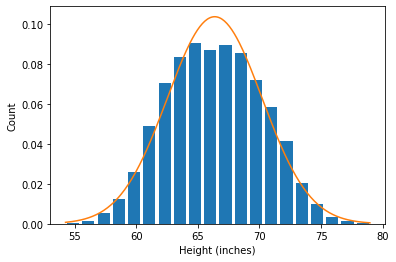

In [27]:
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

range= np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(range, norm.pdf(range,df.Height.mean(),df.Height.std()))

In [28]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## outlier detection and removalusing 3 standard deviation

In [29]:
upper_limit=df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [30]:
lower_limit=df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

In [33]:
df[df.Height<54.824]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [40]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [41]:
df.shape

(10000, 2)

In [42]:
df_no_outlier_std_dev.shape

(9993, 2)

## Outlier detection using z-score

In [43]:
df['zscore'] = (df.Height-df.Height.mean())/df.Height.std()

In [44]:
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [48]:
df[(df.zscore)<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [52]:
df_without_outliers= df[(df.zscore<3) & (df.zscore>-3)]

In [53]:
df_without_outliers

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
